In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import datetime

In [2]:
import seaborn as sb
import plotly.plotly as py
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import plotly.graph_objs as go
from plotly.graph_objs import *

In [3]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [4]:
import tensorflow
import keras

Using TensorFlow backend.


##### Read The csv file (Data set)

In [5]:
df=pd.read_csv('auto-mpg.csv')

# <b>1.Reading Data for cleaning</b>

In [17]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-year,Origin,Car-Name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      398 non-null object
Weight          398 non-null int64
Acceleration    398 non-null float64
Model-year      398 non-null int64
Origin          398 non-null int64
Car-Name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model-year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
df.corr()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model-year,Origin
MPG,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
Cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
Displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
Weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
Acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
Model-year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
Origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


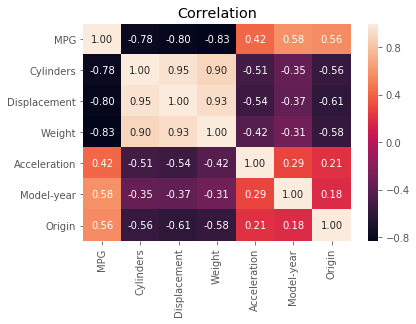

In [10]:
#Visual Represantation
sb.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation")
plt.show()
#before making changes

In [11]:
df.shape

(398, 9)

In [12]:
pp.ProfileReport(df)

Number of variables,9
Number of observations,398
Total Missing (%),0.0%
Total size in memory,28.1 KiB
Average record size in memory,72.2 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,2


# <b>2.Data cleaning / Wrangling</b>
#### i.<br>(a).Finding missing values from the data set:

In [18]:
df.columns.tolist()

['MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model-year',
 'Origin',
 'Car-Name']

In [13]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model-year      0
Origin          0
Car-Name        0
dtype: int64

In [16]:
df.duplicated().value_counts()

False    398
dtype: int64

In [27]:
print(df.isna().sum())

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model-year      0
Origin          0
Car-Name        0
dtype: int64


In [22]:
df.shape

(398, 9)

In [28]:
df.dropna(how='any').shape

(398, 9)

In [31]:
df["Horsepower"]= df["Horsepower"].replace("?",0)


In [33]:
df.drop(df[df['Horsepower'] == 0].index, inplace = True) 

In [34]:
df.shape

(392, 9)

In [35]:
Origin = df.pop("Origin")
df["USA"]= (Origin==1)*1.0
df["Europe"]= (Origin==2)*1.0
df["Japan"]= (Origin==3)*1.0

In [36]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-year,Car-Name,USA,Europe,Japan
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1.0,0.0,0.0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1.0,0.0,0.0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1.0,0.0,0.0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1.0,0.0,0.0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1.0,0.0,0.0
